----

# Análisis de negocio (Showz)

## Limpieza de datos

### Importar librerias necesarias

In [1]:
# Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Cargar los datasets

In [2]:
# Leer los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### Revisar el contenido de los DataFrames

In [3]:
# Echa un vistazo a los datos
visits.info()
display(visits.head())
orders.info()
display(orders.head())
costs.info()
display(costs.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Convertir columnas a minusculas y agregar el estilo "snake_case"

In [4]:
# Convertir a minusculas todas las columnas de nuestros DataFrames
visits.columns = visits.columns.str.lower().str.replace(' ', '_') # Sustituimos espacios por guiones bajos
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
print(visits.columns)
print(orders.columns)
print(costs.columns)


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


### Convertimos a dato de tiempo

In [5]:
# Convertir al formato de tiempo las columnas que lo requieren
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

### Verificamos filas duplicadas 

In [6]:
# Verificar duplicados
visits.duplicated().sum()
orders.duplicated().sum()
costs.duplicated().sum()

0

In [7]:
# Eliminar errores de fechas negativas
visits = visits[visits['end_ts'] >= visits['start_ts']]

## Informes y cálculo de métricas

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [8]:
# Creamos columnas con la agrupación por día, semana, mes y año
visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.to_period('M')
visits['year'] = visits['start_ts'].dt.isocalendar().year


In [9]:
# Calculando DAU ("Daily Active Users")
dau_ = visits.groupby('day').agg({'uid':'nunique'})
dau = dau_.mean()
print(int(dau))

907


In [10]:
# Calculando WAU ("Weekly Active Users")
wau_ = visits.groupby(['year','week']).agg({'uid':'nunique'})
wau = wau_.mean()
print(int(wau))

5716


In [11]:
# Calculando MAU ("Monthly Active Users")
mau_ = visits.groupby(['year','month']).agg({'uid':'nunique'})
mau = mau_.mean()
print(int(mau))

23228


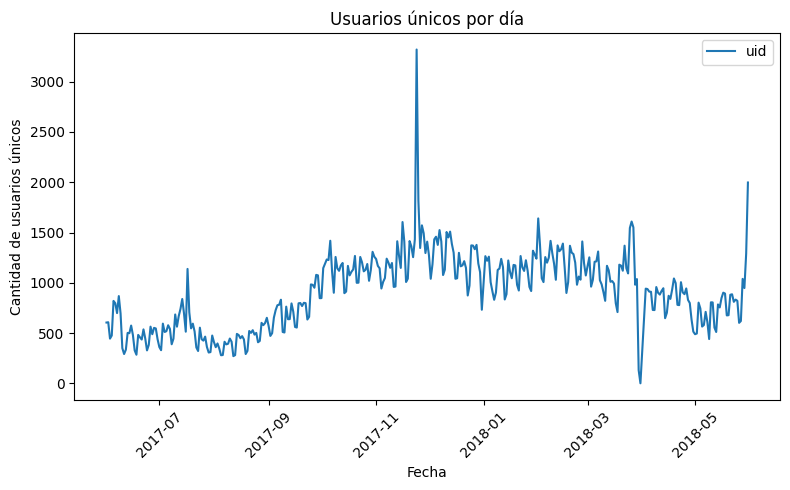

In [12]:
# Gráfico: Usuarios por día
plt.figure(figsize=(8, 5))
sns.lineplot(data=dau_)
plt.title('Usuarios únicos por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

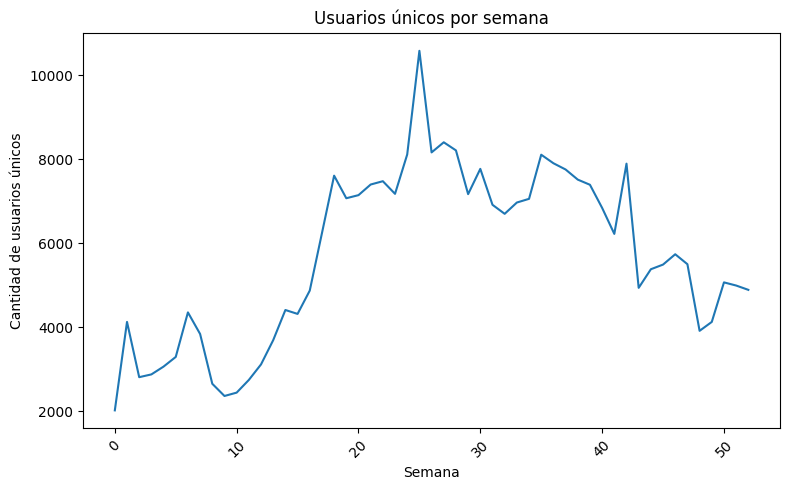

In [13]:
wau_ = wau_.reset_index()
# Gráfico: Usuarios por semana
plt.figure(figsize=(8, 5))
sns.lineplot(data=wau_['uid'])
plt.title('Usuarios únicos por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

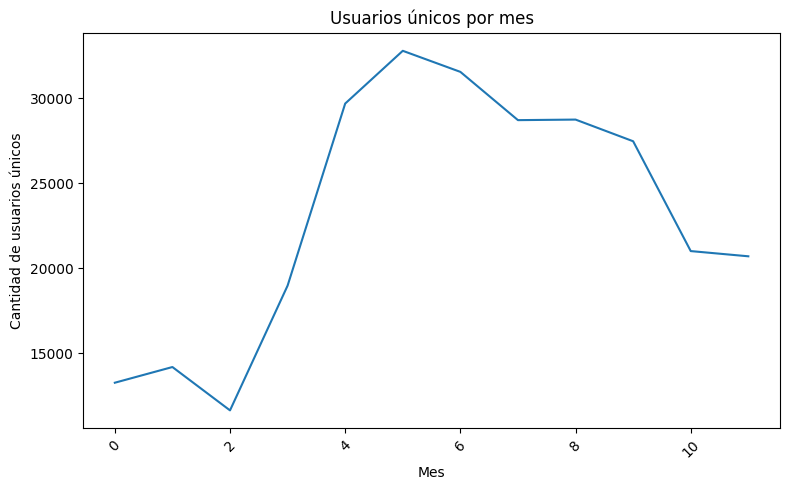

In [14]:
mau_ = mau_.reset_index()
# Gráfico: Usuarios por mes
plt.figure(figsize=(8, 5))
sns.lineplot(data=mau_['uid'])
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los resultados obtenido son los siguientes:

DAU ("Daily Active Users"): 907 usuarios promedio
WAU ("Weekly Active Users"): 5825 usuarios promedio
MAU ("Monthly Active Users"): 23228 usuarios promedio
Estos datos nos dan una base desde la que podemos partir para seguir analizando

* A mediados de diciembre se presento el mayor número de usuarios, llegando a ser más de 3 mil diarios.
* Se puede ver que entre la semana 40 y 50 es cuando hay más usuarios semanales llegando a sobrepasar los 10 mil usuarios
* Los meses de noviembre y diciembre son los meses con más usuarios, llegando a tener arriba de 30 mil ususarios


#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [15]:
# Agrupamos los datos por día
sessions_day = visits.groupby('day').agg(
    n_sessions=('uid', 'count'),
    n_users=('uid', 'nunique')
)
# Creamos columna que muestra el promedio de sesiones por usuario por día
sessions_day['sessions_per_user'] = sessions_day['n_sessions'] / sessions_day['n_users']
display(sessions_day)



,n_sessions,n_users,sessions_per_user
day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


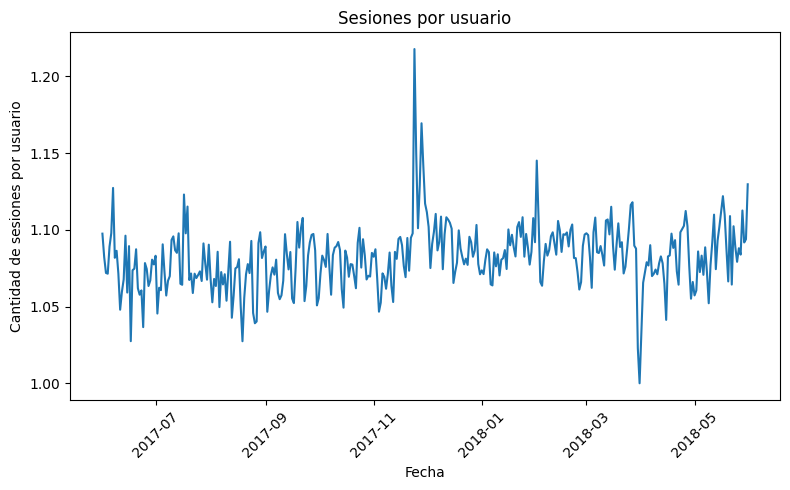

In [16]:
# Gráfico: sesiones por usuario
plt.figure(figsize=(8, 5))
sns.lineplot(data=sessions_day['sessions_per_user'])
plt.title('Sesiones por usuario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de sesiones por usuario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Sesiones promedio por día
n_sessions_mean  = sessions_day['n_sessions'].mean()
print(int(n_sessions_mean))
# Sesion por usuario promedio
session_per_user_mean = n_sessions_mean / dau 
print(session_per_user_mean)

987
uid    1.087408
dtype: float64


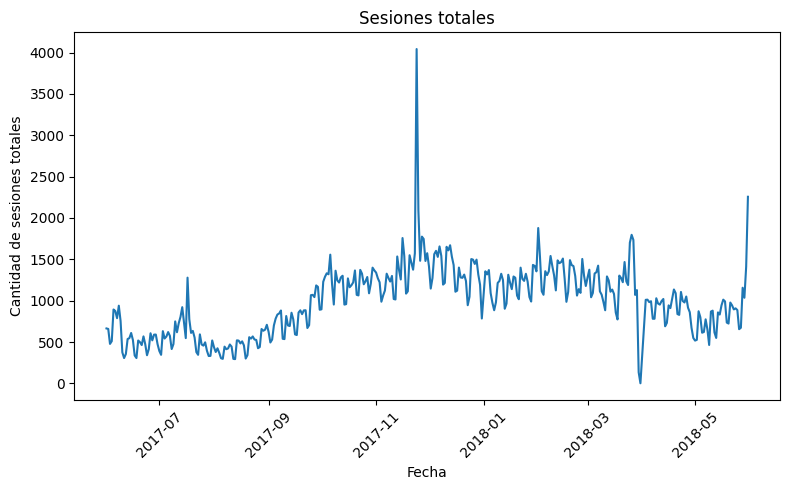

In [18]:
# Gráfico: sesiones 
plt.figure(figsize=(8, 5))
sns.lineplot(data=sessions_day['n_sessions'])
plt.title('Sesiones totales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de sesiones totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* El número de sesiones promedio son 987, se puede observar una subida muy grande de hasta 4 mil sesiones en una fecha a fines del 2017 y una bajada muy grande en una fecha de abril, esto último puede sugerir alguna falla en el servidor. 
* Al comparar el número de sesiones con el número de usuarios únicos diarios, observamos que el promedio de sesiones por usuario es de 1.08. Esto sugiere que cerca del 8% de los usuarios inicia sesión más de una vez por día.
*  El punto más alto se alcanzó en el mes de noviembre con más de 1.20 sesiones por ususario. El punto mínimo se llego en el mes de abril, llegando casi a solamente una sesión por usuario.

#### ¿Cuál es la duración de cada sesión?

In [19]:
# Creamos nueva columna con la duración de la sesión en segundos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
# Sesion promedio
asl = visits['session_duration'].mode()
print(asl)

0    60.0
dtype: float64


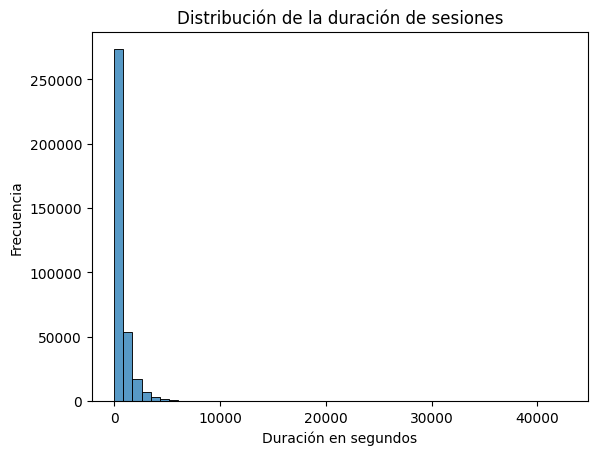

In [20]:
# Distribución 
sns.histplot(visits['session_duration'], bins=50)
plt.title('Distribución de la duración de sesiones')
plt.xlabel('Duración en segundos')
plt.ylabel('Frecuencia')
plt.show()

El análisis de los datos mostró que la duración típica de una sesión es de aproximadamente 60 segundos

#### ¿Con qué frecuencia los usuarios regresan?

In [21]:
# Calculando sticki wau
sticki_wau = dau/wau *100
print(sticki_wau)

uid    15.884409
dtype: float64


In [22]:
# Calculando sticki mau
sticki_mau = dau/mau *100
print(sticki_mau)

uid    3.90897
dtype: float64


El 15.8 % de los usuarios semanales utilizan la aplicación en un día promedio (Sticky Factor semanal), mientras que solo el 3.9 % de los usuarios mensuales lo hacen (Sticky Factor mensual)

### Ventas

#### ¿Cuándo empieza la gente a comprar?

In [23]:
# Obteniendo la primera compra por usuario
first_purchase_date = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase_date.columns = ['uid', 'first_purchase_date']


In [24]:
# Obteniendo la primera visita por usuario
registration = visits.groupby('uid')['start_ts'].min().reset_index()
registration.columns = ['uid', 'registration_ts']


In [25]:
# Uniendo tablas
conversion = pd.merge(registration, first_purchase_date, on='uid', how='inner')



In [26]:
# Calculando los días de conversión
conversion['conversion_days'] = (
    conversion['first_purchase_date'] - conversion['registration_ts']
).dt.days

# Ordenamos 
conversion = conversion.sort_values('conversion_days') 



In [27]:
# Categorizar el tiempo de conversión
def category(dias):
    if 0 == dias :
        return '0 days'
    elif 1 <= dias <= 7:
        return '2-7 days'
    elif 8 <= dias <= 30:
        return '8-30 days'
    elif 31 <= dias <= 90:
        return '31-90 days'
    elif 91 <= dias <= 180:
        return '91-180 days'
    else:
        return '>180 days'


In [28]:
# Aplicando función al DataFrame 'conversion'
conversion['category_conversion'] = conversion['conversion_days'].apply(
    category)
display(conversion.head())

,uid,registration_ts,first_purchase_date,conversion_days,category_conversion
36522,18446167067214817906,2017-10-17 10:05:00,2017-10-17 10:16:00,0,0 days
21360,10806131951304495532,2017-11-01 16:44:00,2017-11-01 17:00:00,0,0 days
21359,10805864546797828557,2018-03-01 20:36:00,2018-03-01 20:38:00,0,0 days
21358,10805375694118161904,2018-05-22 08:45:00,2018-05-22 08:54:00,0,0 days
21357,10805153392639169663,2018-03-04 17:23:00,2018-03-04 17:44:00,0,0 days


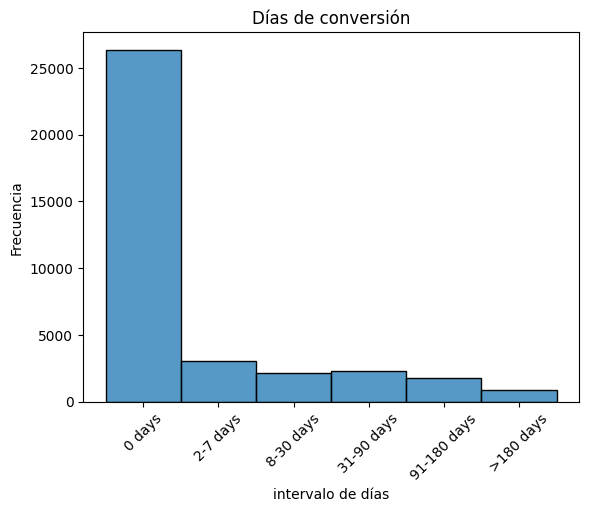

In [29]:
# Graficando
sns.histplot(data=conversion, x='category_conversion', bins=20)  
plt.title('Días de conversión')
plt.xlabel('intervalo de días')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Se observa que la conversión a compra tiende a ser inmediata, concentrándose mayoritariamente durante la primera visita del usuario.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [30]:
# Creando columna de mes para hacer análisis mensual
orders['month'] = orders['buy_ts'].dt.to_period('M')
# Calculando pedidos mensuales
monthly_orders = orders.groupby('month')['uid'].count()
display(monthly_orders)

month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, Name: uid, dtype: int64

<AxesSubplot:title={'center':'Pedidos por mes'}, xlabel='month'>

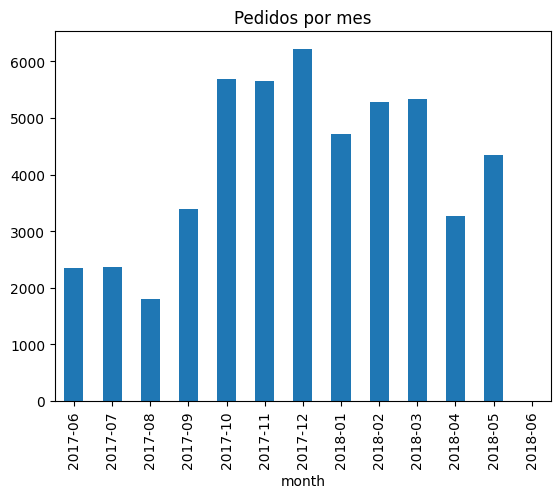

In [31]:
# Graficando
monthly_orders.plot(kind='bar', title='Pedidos por mes')

Los datos muestran que octubre, noviembre y diciembre son los meses con mayor volumen de ventas.

#### ¿Cuál es el tamaño promedio de compra?

In [32]:
# Calculando pedido promedio
average_order_value = orders['revenue'].mean()
print(f'Tamaño promedio de compra: ${average_order_value:.2f}')


Tamaño promedio de compra: $5.00


### ¿Cuánto dinero traen? (LTV)

LTV promedio: $6.90


<AxesSubplot:title={'center':'LTV por Cohorte Mensual'}, xlabel='month'>

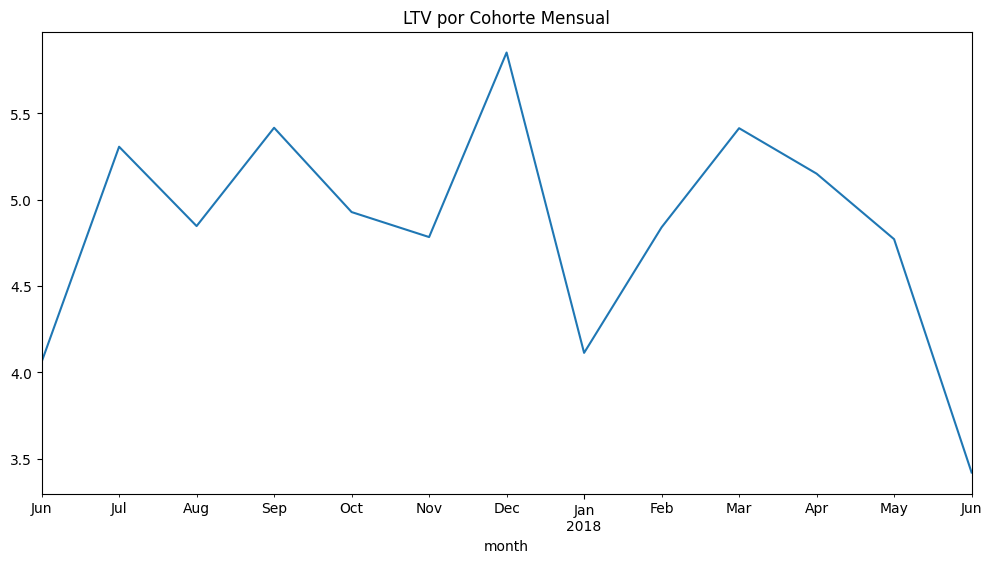

In [33]:
# Calculando LTV por usuario
user_revenue = orders.groupby('uid')['revenue'].sum().reset_index()
ltv = user_revenue['revenue'].mean()

print(f"LTV promedio: ${ltv:.2f}")

# LTV por cohorte mensual
ltv_by_cohort = orders.groupby('month')['revenue'].mean()
ltv_by_cohort.plot(figsize=(12,6), title='LTV por Cohorte Mensual')

Se observa que el LTV aumenta significativamente en el mes de diciembre y disminuye considerablemente en enero, lo cual podría indicar un patrón estacional en nuestro negocio.

In [34]:
# Calculamos el mes de la primera compra
first_purchase = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_purchase.columns = ['uid', 'first_purchase_month']
first_purchase.head()

,uid,first_purchase_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [35]:
# Calculamos el número de nuevos clientes
cohort_sizes = first_purchase.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
cohort_sizes.head()

,first_purchase_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [36]:
orders_ = pd.merge(orders,first_purchase, on='uid')
orders_.head()

,buy_ts,revenue,uid,month,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06


In [37]:
cohorts = orders_.groupby(['first_purchase_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_purchase_month,month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [38]:
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_month')
report.head()

,first_purchase_month,n_buyers,month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58


In [39]:
report['age'] = (
    (report['month'].dt.year - report['first_purchase_month'].dt.year) * 12 + 
    (report['month'].dt.month - report['first_purchase_month'].dt.month)
)
report.head()

,first_purchase_month,n_buyers,month,revenue,age
0,2017-06,2023,2017-06,9557.49,0
1,2017-06,2023,2017-07,981.82,1
2,2017-06,2023,2017-08,885.34,2
3,2017-06,2023,2017-09,1931.30,3
4,2017-06,2023,2017-10,2068.58,4


In [40]:
report['ltv'] = report['revenue'] / report['n_buyers']

# Transformar a tabla pivote y acumular en axis=1 el revenue
output = report.pivot_table(
    index='first_purchase_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum').cumsum(axis=1)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02,4.156987,4.435262,4.513777,4.587921,,,,,,,,


La cohorte de septiembre es la que tiene el LTV más alto, en promedio generaron $13.43 en 9 meses de ciclo de vida

## Marketing

### ¿Cuánto dinero se gastó?  

<AxesSubplot:title={'center':'Gastos Totales por Fuente'}, xlabel='source_id'>

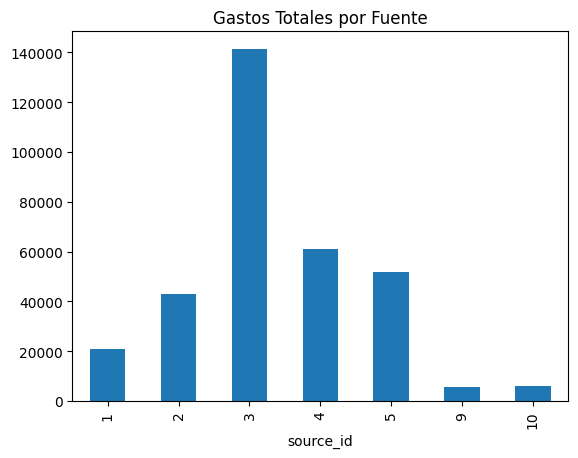

In [41]:
# Gastos totales por fuente
costs_by_source = costs.groupby('source_id')['costs'].sum()
costs_by_source.plot(kind='bar', title='Gastos Totales por Fuente')


<AxesSubplot:title={'center':'Gastos Mensuales de Marketing'}, xlabel='dt'>

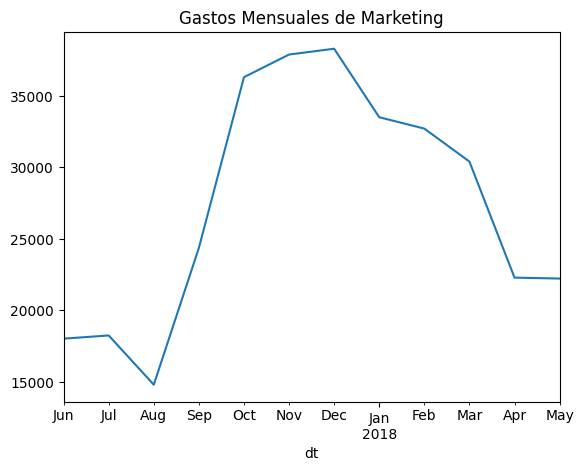

In [42]:
# Gastos a lo largo del tiempo
costs.resample('M', on='dt')['costs'].sum().plot(title='Gastos Mensuales de Marketing')

Se observa que el gasto mas alto se presenta en la fuente 3 y el pico más alto de gastos totales es en el mes de diciembre.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [43]:
# Fuente y fecha de primera visita por usuario
visits_sorted = visits.sort_values(by='start_ts')
first_visits = visits_sorted.groupby('uid').first().reset_index()
first_visits = first_visits[['uid', 'start_ts', 'source_id']]
first_visits.columns = ['uid', 'first_visited_date', 'source_id']
first_visits


,uid,first_visited_date,source_id
0,11863502262781,2018-03-01 17:27:00,3
1,49537067089222,2018-02-06 15:55:00,2
2,297729379853735,2017-06-07 18:47:00,3
3,313578113262317,2017-09-18 22:49:00,2
4,325320750514679,2017-09-30 14:29:00,5
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,5
228165,18446424184725333426,2017-12-06 20:32:00,4
228166,18446556406699109058,2018-01-01 16:29:00,3
228167,18446621818809592527,2017-12-27 13:27:00,4


In [44]:
# Juntar fuente y fecha de compra
buyers = pd.merge(first_purchase_date, first_visits, on='uid')
buyers['first_purchase_day'] = buyers['first_purchase_date'].dt.date

In [45]:
# Agrupar por fuente y día de compra: contar compradores únicos
buyers_by_source_date = buyers.groupby(['source_id', 'first_purchase_day'])['uid'].nunique().reset_index()
buyers_by_source_date.columns = ['source_id', 'dt', 'n_buyers']
buyers_by_source_date['dt'] = pd.to_datetime(buyers_by_source_date['dt'])

In [46]:
# Unir con la tabla de costos 
cac_df = pd.merge(costs, buyers_by_source_date, on=['source_id', 'dt'], how='left')


In [47]:
# 6. Calcular CAC diario 
cac_df['cac'] = cac_df['costs'] / cac_df['n_buyers'] 

cac_df.head()

,source_id,dt,costs,n_buyers,cac
0,1,2017-06-01,75.20,14.0,5.371429
1,1,2017-06-02,62.25,7.0,8.892857
2,1,2017-06-03,36.53,7.0,5.218571
3,1,2017-06-04,55.00,3.0,18.333333
4,1,2017-06-05,57.08,18.0,3.171111


In [48]:
# Calculo CAC promedio por fuente 
cac_by_source = cac_df.groupby('source_id')['cac'].mean().reset_index()
cac_by_source.columns = ['source_id', 'avg_cac']

cac_by_source.sort_values('avg_cac')

,source_id,avg_cac
6,10,6.555415
5,9,6.842532
3,4,7.271743
4,5,8.336731
0,1,9.489732
2,3,15.580474
1,2,16.287024


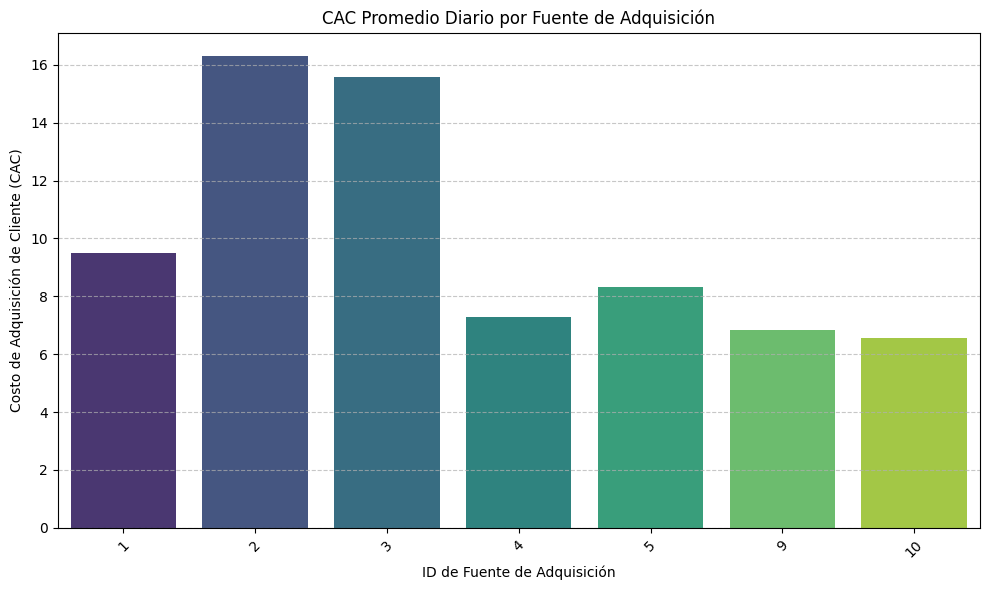

In [49]:
# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=cac_by_source, x='source_id', y='avg_cac', palette='viridis')

plt.title('CAC Promedio Diario por Fuente de Adquisición')
plt.xlabel('ID de Fuente de Adquisición')
plt.ylabel('Costo de Adquisición de Cliente (CAC)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El CAC más alto lo presenta la fuente número 2, tenemos que analizar si es rentable mantenerla

### ¿Cuán rentables eran las inversiones? (ROMI)

La fuente de marketing más rentable es la número 1 y la menos rentable es la 3.

In [50]:
# Calculo primera visita 
first_visit_source = (
    visits
    .sort_values('start_ts')  
    .groupby('uid')           
    ['source_id'].first()      
    .reset_index()
    .rename(columns={'source_id': 'first_source'})
)

In [51]:
# Calculo primera compra
first_purchase_month = (
    orders
    .sort_values('buy_ts')   
    .groupby('uid')            
    ['buy_ts'].first()       
    .dt.to_period('M')         
    .reset_index()
    .rename(columns={'buy_ts': 'first_purchase_month'})
)

In [52]:
# Uiendo primeras compras y primeras visitas
final_df = (
    orders
    .merge(first_visit_source, on='uid', how='left')       
    .merge(first_purchase_month, on='uid', how='left')     
)
final_df.head()

,buy_ts,revenue,uid,month,first_source,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,3,2017-06


In [53]:
# Calcular tamaño de cohortes (usuarios únicos por fuente y mes)
cohort_data = final_df[['uid', 'first_source', 'first_purchase_month']].drop_duplicates()
cohort_sizes = cohort_data.groupby(['first_source', 'first_purchase_month']).size().reset_index()
cohort_sizes.columns = ['first_source', 'cohort_month', 'cohort_size']


In [54]:
# Convertir costos diarios a mensuales
costs['month'] = costs['dt'].dt.to_period('M')
monthly_costs = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()


In [55]:
# 3. Calculo Cac
cac_data = pd.merge(
    cohort_sizes,
    monthly_costs.rename(columns={'source_id': 'first_source', 'month': 'cohort_month'}),
    on=['first_source', 'cohort_month'],
    how='left'
).fillna(0)  # Asumir 0 costos para combinaciones sin datos

cac_data['cac'] = cac_data['costs'] / cac_data['cohort_size'].replace(0, float('nan'))  # Evitar división por 0

In [56]:
# Calcular edad de la cohorte en meses
final_df['months_since_cohort'] = (final_df['month'] - final_df['first_purchase_month']).apply(lambda x: x.n)

In [57]:
# Revenue acumulado por cohorte
revenue = final_df.groupby(
    ['first_source', 'first_purchase_month', 'months_since_cohort']
)['revenue'].sum().reset_index()

In [58]:
# Calculo LTV 
ltv_data = pd.merge(
    revenue,
    cohort_sizes,
    left_on=['first_source', 'first_purchase_month'],
    right_on=['first_source', 'cohort_month'],
    how='left'
)

ltv_data['ltv'] = ltv_data.groupby(['first_source', 'cohort_month'])['revenue'].cumsum() / ltv_data['cohort_size']


In [59]:
# Calculo ROMI 

# Uniendo ltv con cac
final_metrics = pd.merge(ltv_data,cac_data[['first_source', 'cohort_month', 'cac']],on=['first_source', 'cohort_month'],how='left')

# Calcular ROMI 
final_metrics['romi'] = (final_metrics['ltv'] / final_metrics['cac']).replace([np.inf, -np.inf], np.nan)
final_metrics.head()

,first_source,first_purchase_month,months_since_cohort,revenue,cohort_month,cohort_size,ltv,cac,romi
0,1,2017-06,0,1378.70,2017-06,190,7.256316,5.924263,1.224847
1,1,2017-06,1,414.98,2017-06,190,9.440421,5.924263,1.593518
2,1,2017-06,2,419.43,2017-06,190,11.647947,5.924263,1.966143
3,1,2017-06,3,714.24,2017-06,190,15.407105,5.924263,2.600679
4,1,2017-06,4,811.20,2017-06,190,19.676579,5.924263,3.321355


In [60]:
# Pivote table de Romi por fuente y cohorte mensual
romi_pivot = final_metrics.pivot_table(
    index=['first_source', 'cohort_month'],
    columns='months_since_cohort',
    values='romi',
    aggfunc='sum')

In [61]:
display(romi_pivot)

months_since_cohort              0         1         2         3         4   \
first_source cohort_month                                                     
1            2017-06       1.224847  1.593518  1.966143  2.600679  3.321355   
             2017-07       1.087447  1.250848  2.049390  2.274131  2.405115   
             2017-08       0.889621  1.031761  1.151700  1.266240  1.389626   
             2017-09       0.909009  1.181317  1.265844  1.405616  1.411475   
             2017-10       0.883658  1.038674  1.074611  1.131551  1.140840   
...                             ...       ...       ...       ...       ...   
10           2018-01       0.464084  0.466363  0.476813       NaN       NaN   
             2018-02       0.632736  0.662390  0.663409       NaN       NaN   
             2018-03       1.212819  1.236964  1.248912       NaN       NaN   
             2018-04       0.674643       NaN       NaN       NaN       NaN   
             2018-05       1.148905       NaN       NaN       NaN       NaN   

months_since_cohort              5         6         7         8         9   \
first_source cohort_month                                                     
1            2017-06       3.667247  4.102993  4.528744  4.912670  5.193673   
             2017-07       2.539315  2.605958  2.702315  2.830130  2.977080   
             2017-08       1.468739  1.549490  1.864952  2.125330  2.217785   
             2017-09       1.425883  1.438725  1.485103  1.574257       NaN   
             2017-10       1.156727  1.183642  1.230737       NaN       NaN   
...                             ...       ...       ...       ...       ...   
10           2018-01            NaN       NaN       NaN       NaN       NaN   
             2018-02            NaN       NaN       NaN       NaN       NaN   
             2018-03            NaN       NaN       NaN       NaN       NaN   
             2018-04            NaN       NaN       NaN       NaN       NaN   
             2018-05            NaN       NaN       NaN       NaN       NaN   

months_since_cohort              10        11  
first_source cohort_month                      
1            2017-06       5.397047  5.679045  
             2017-07       3.115465       NaN  
             2017-08            NaN       NaN  
             2017-09            NaN       NaN  
             2017-10            NaN       NaN  
...                             ...       ...  
10           2018-01            NaN       NaN  
             2018-02            NaN       NaN  
             2018-03            NaN       NaN  
             2018-04            NaN       NaN  
             2018-05            NaN       NaN  

[86 rows x 12 columns]

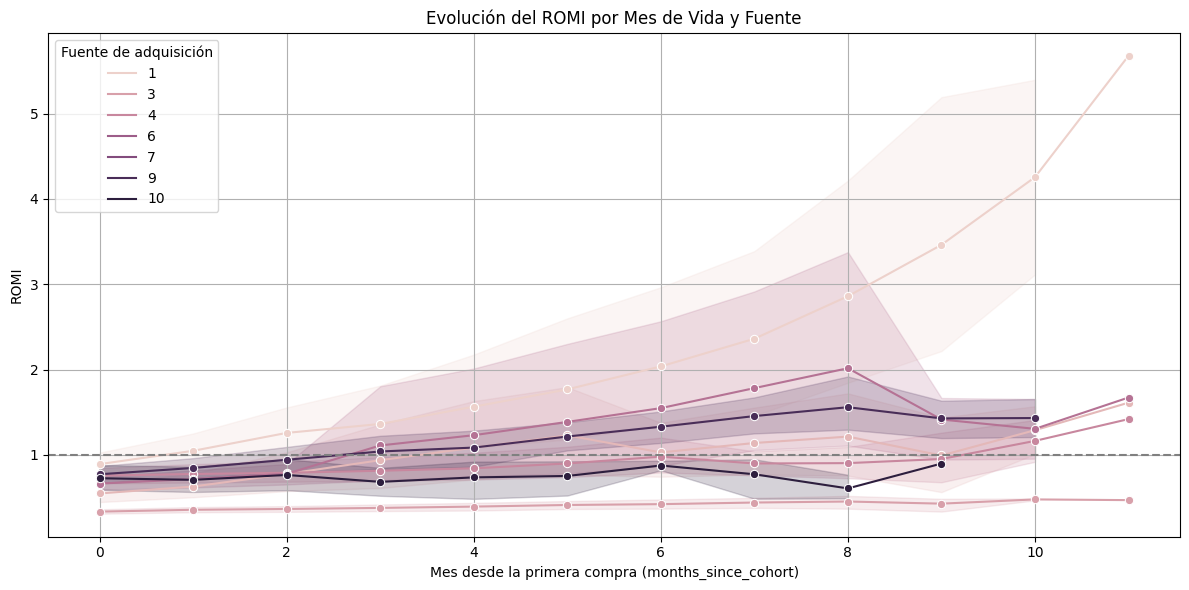

In [62]:
# Grafico de lineas para comparar Romi de cada fuente

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

sns.set_palette("tab10")  

# Gráfico de líneas con seaborn
sns.lineplot(
    data=final_metrics,
    x='months_since_cohort',
    y='romi',
    hue='first_source',
    marker="o"
)

# Personalización
plt.title('Evolución del ROMI por Mes de Vida y Fuente')
plt.xlabel('Mes desde la primera compra (months_since_cohort)')
plt.ylabel('ROMI')
plt.legend(title='Fuente de adquisición')
plt.axhline(1, color='gray', linestyle='--', label='Punto de equilibrio')
plt.grid(True)
plt.tight_layout()

# Muestra el gráfico
plt.show()


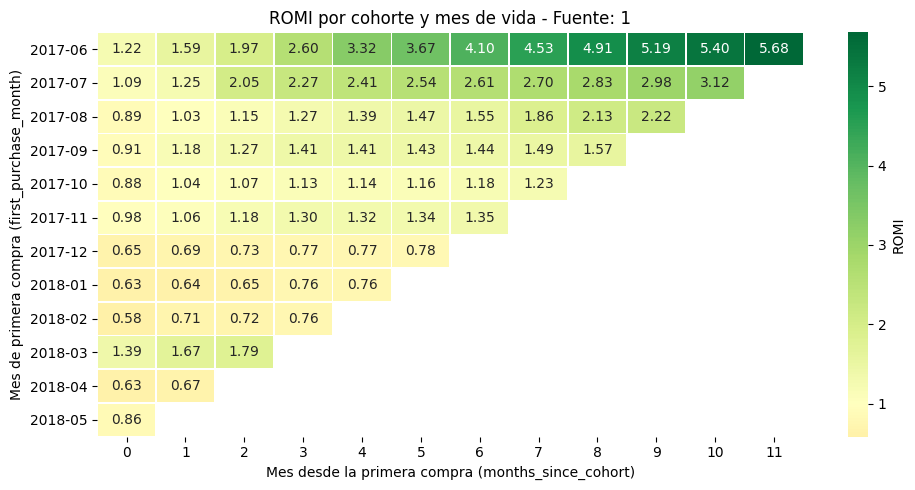

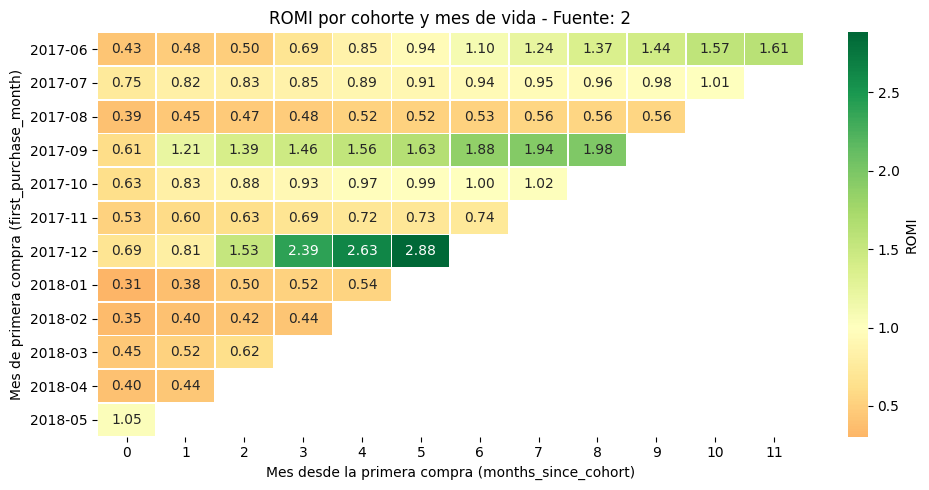

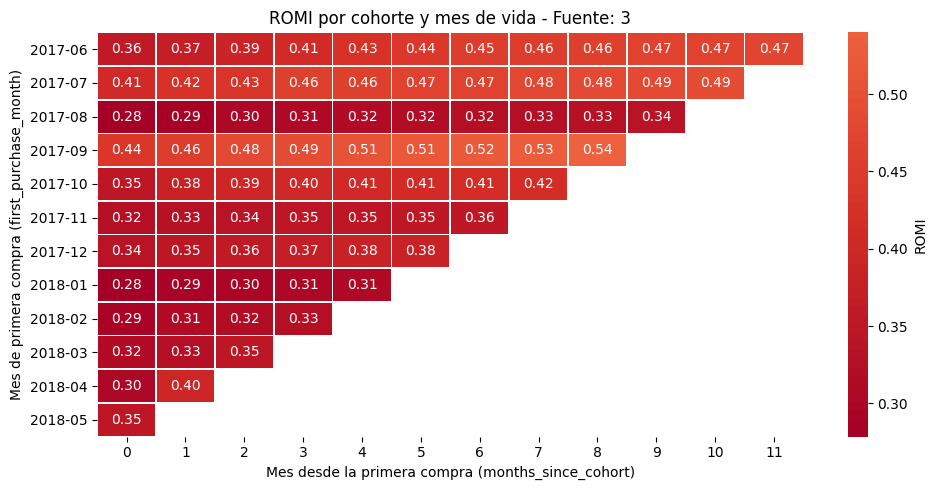

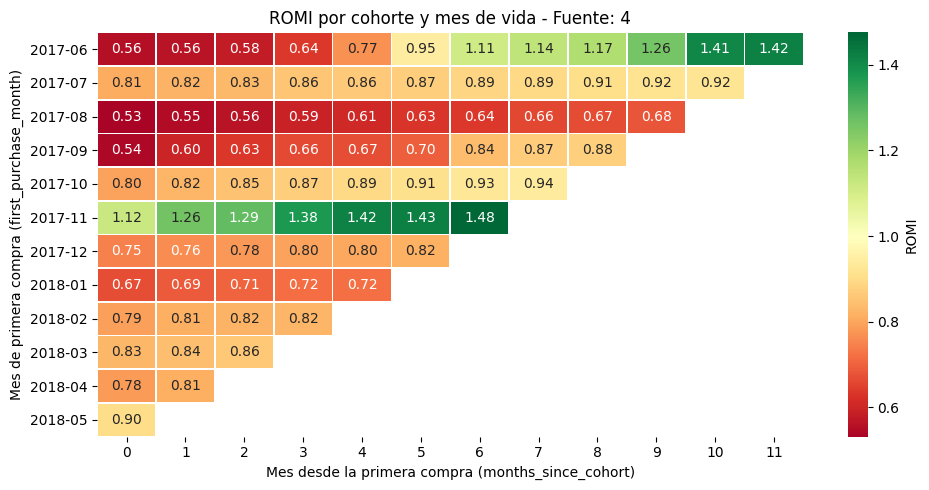

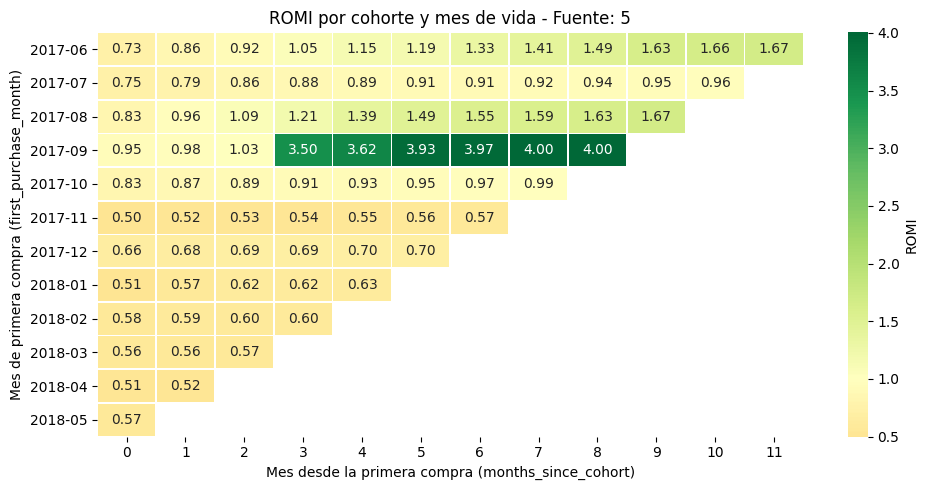

No hay datos para la fuente 7, se omite el heatmap.


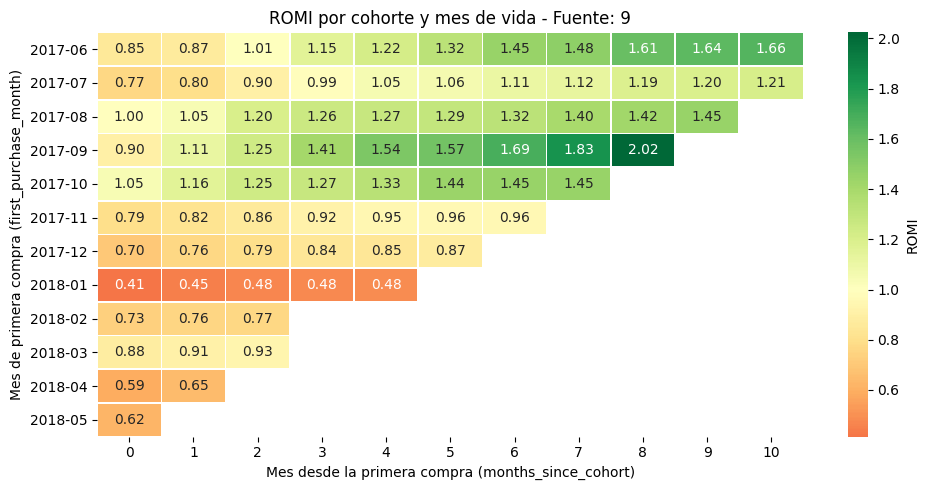

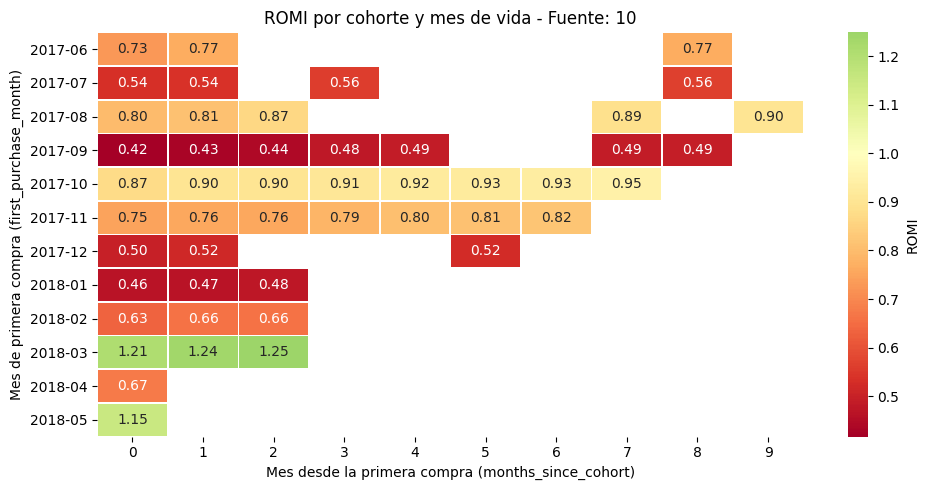

In [63]:
# Calcular cohorte por cada uno de las fuentes 
sources = final_metrics['first_source'].unique()

for source in sources:
    data_source = final_metrics[final_metrics['first_source'] == source]

    pivot = data_source.pivot_table(
        index='first_purchase_month',
        columns='months_since_cohort',
        values='romi'
    )
    
    if pivot.empty:
        print(f"No hay datos para la fuente {source}, se omite el heatmap.")
        continue  # Salta a la siguiente fuente
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(
        pivot,
        annot=True,
        fmt=".2f",
        cmap="RdYlGn",
        center=1.0,
        linewidths=0.5,
        cbar_kws={"label": "ROMI"}
    )
    plt.title(f'ROMI por cohorte y mes de vida - Fuente: {source}')
    plt.xlabel('Mes desde la primera compra (months_since_cohort)')
    plt.ylabel('Mes de primera compra (first_purchase_month)')
    plt.tight_layout()
    plt.show()


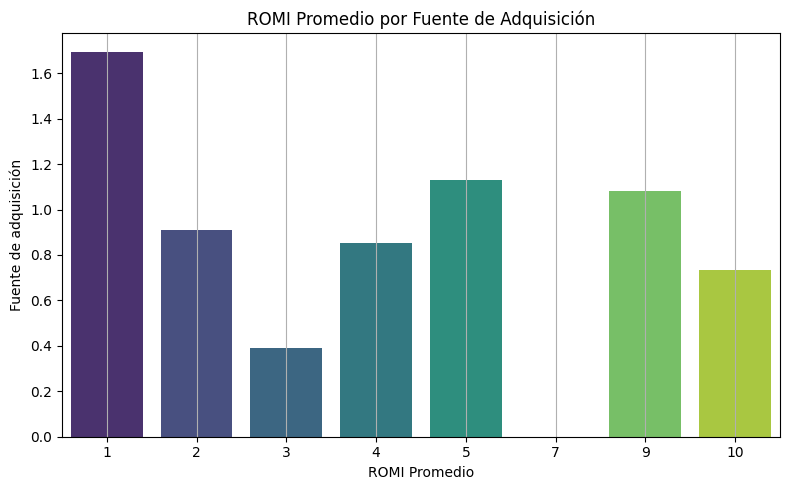

In [64]:
# Calcular ROMI promedio por fuente
romi_avg = final_metrics.groupby('first_source')['romi'].mean().reset_index()

# Ordenar para que el gráfico sea más claro
romi_avg = romi_avg.sort_values(by='romi', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=romi_avg, x= 'first_source', y='romi', palette='viridis')

plt.title('ROMI Promedio por Fuente de Adquisición')
plt.xlabel('ROMI Promedio')
plt.ylabel('Fuente de adquisición')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

* Muchas de las inversiones de las fuentes de marketing no estan siendo rentables hasta el mes 7 o 8 (en algunos cohortes)
* La fuente más rentable es la 1, empieza a ser rentable en la mayoria de sus cohortes desde el segundo mes.
* La menos rentable es la fuente 3, la cual no ha logrado obtener romi positivo en ninguno de sus cohortes.

### Conclusión

Después de analizar los datos:

- La duración promedio de las sesiones es de aproximadamente 1 minuto, y cerca del 8% regresan al sitio más de una vez.
- La mayoría de los usuarios convierten en el primer  día tras su primera visita.
- El LTV promedio por usuario es de 6.90 USD superando a lo largo del tiempo en algunos cohortes superan los 10 USD , mientras que el CAC promedio varía según la fuente.
- Las fuente con mejor rendimiento en términos de **ROMI** es la fuente 1 con una rentabilidad promedio superior al 60%
- Las fuentes con ROMI negativo (2, 3, 4 y 10) deben ser reevaluadas o eliminadas.
  

### Recomendación

Invertir en las fuente 1 con mayor ROMI y analizar si las fuentes con ROMI negativo pueden optimizarse. Considerar el retargeting para usuarios que no convierten rápidamente. Continuar analizando el comportamiento por dispositivo y plataforma para mejorar la experiencia del usuario y maximizar conversiones.
